In [7]:
import numpy as np
import gym
import random

import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
env_info =     """
    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.
    Adapted from Example 6.6 (page 106) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/bookdraft2018jan1.pdf
    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py
    The board is a 4x12 matrix, with (using NumPy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center
    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.
    """
print(env_info)


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.
    Adapted from Example 6.6 (page 106) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/bookdraft2018jan1.pdf
    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py
    The board is a 4x12 matrix, with (using NumPy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center
    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.
    


![alt text](cliff.png "cliff pic")

creating the environment

In [9]:
env = gym.make("CliffWalking-v0")
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [10]:
state_size = env.observation_space.n
action_size = env.action_space.n

state_size, action_size

(48, 4)

In [11]:
qtable = np.zeros((state_size, action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [12]:
total_episodes = 3_000        # Total episodes
learning_rate = 0.9           # Learning rate
max_steps = 100                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 0.1                # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0 #0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

![alt text](q_alg.png "Algorithm")

Train

In [13]:
rewards = []

for episode in range(total_episodes):
    state = env.reset()
    done = False
    total_rewards = 0
#     print(f"episode: {episode}")
#     env.render()
    for step in range(max_steps):
        # Choose A from S using policy derived from Q (e.g., "epsilon-greedy)
        exp_exp_tradeoff = random.uniform(0,1)
        
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        else:
            action = env.action_space.sample()
        
        # Take action A, observe R, new_state
        new_state, reward, done, info = env.step(action)
        
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # S = new_state
        state = new_state
        if done == True or reward == -100:
            break
            
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    
print(qtable)

[[  -9.77302157   -9.51171595  -10.05893936   -9.82207791]
 [  -9.47268333   -9.10284908   -9.67104652   -9.44927601]
 [  -9.37461036   -9.10597645   -9.17049757   -9.42195734]
 [  -8.68130905   -8.61944044   -8.62288236   -9.17838944]
 [  -8.14161383   -8.02410454   -8.02384306   -9.10448528]
 [  -7.66158235   -7.39450486   -7.39492976   -8.23747982]
 [  -6.8610518    -6.73129661   -6.73151464   -7.98857767]
 [  -6.2188707    -6.03316433   -6.03322531   -7.35105209]
 [  -5.99890929   -5.29813803   -5.29813055   -6.68683905]
 [  -5.29343371   -4.52437947   -4.52437598   -4.99459755]
 [  -4.39557299   -3.70987481   -3.70987495   -4.28153082]
 [  -3.66833912   -3.70910724   -2.8525       -3.30464869]
 [  -9.8673639    -9.73315814   -9.73315825  -10.19640907]
 [  -9.30903738   -9.19279825   -9.19279825  -10.24224091]
 [  -9.41702603   -8.62399815   -8.62399815   -9.70723277]
 [  -9.16284661   -8.02526122   -8.02526122   -9.19237779]
 [  -8.6186629    -7.39501181   -7.39501181   -8.6239896

plotting first 500 episodes

Text(0, 0.5, 'reward')

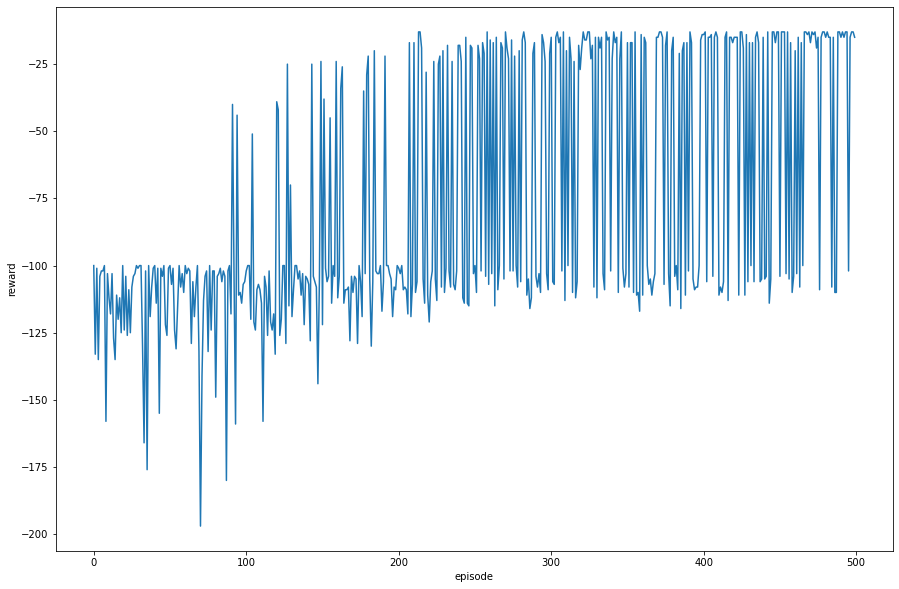

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(range(500), rewards[:500] )
ax.set_xlabel("episode")
ax.set_ylabel("reward")

Rewards vs episodes

Text(0, 0.5, 'reward')

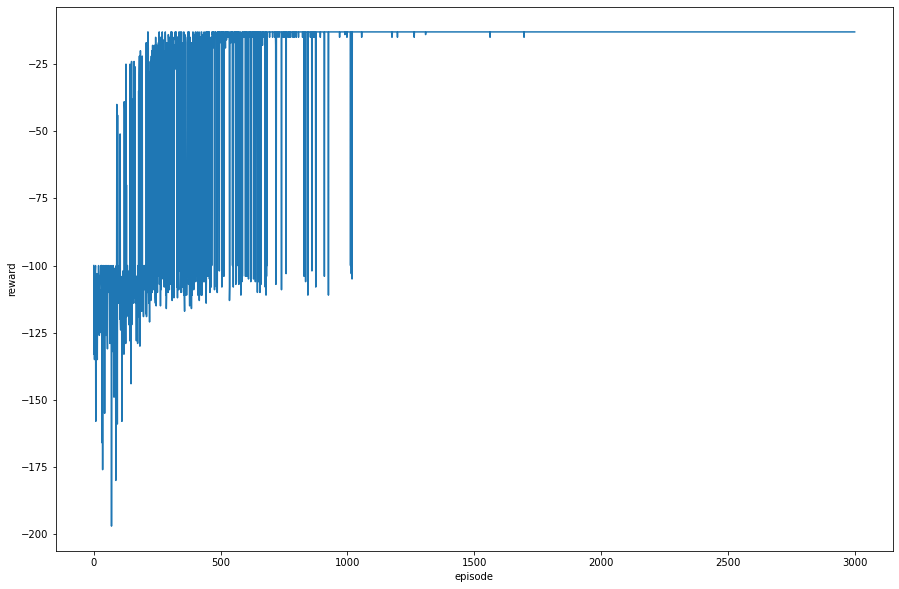

In [15]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(range(total_episodes), rewards)
ax.set_xlabel("episode")
ax.set_ylabel("reward")

In [16]:
# saving the learnt q-table
np.save("Final_q_table", qtable)